In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download ('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import numpy as np 
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Artur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Download required NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Additional tokenizer data
print("NLTK data downloaded successfully!")


NLTK data downloaded successfully!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Artur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Artur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Artur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
df = pd.read_csv('data.csv', sep=',')
df.shape
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [19]:
df['toxic'] = df['toxic'].apply(int)
df.head(5)

df["toxic"].value_counts()



toxic
0    9586
1    4826
Name: count, dtype: int64

In [20]:
#for c in df[df['toxic'] == 1]['comment'].head(5):
    #print(c)

for c in df[df['toxic'] == 0]['comment'].head(5):
    print(c)





В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [21]:
train_df, test_df = train_test_split(df, test_size=500)
test_df.shape

(500, 2)

In [22]:
test_df['toxic'].value_counts()


toxic
0    328
1    172
Name: count, dtype: int64

In [23]:
train_df['toxic'].value_counts()

toxic
0    9258
1    4654
Name: count, dtype: int64

In [24]:
sentence_exanple = df .iloc[1]["comment"]

tokens = word_tokenize(sentence_exanple, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words ('russian')
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer (language="russian")
stenmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [25]:
print(f"isxodni tekst: {sentence_exanple}")
print("-------------------")
print(f"tokens: {tokens}")
print("-------------------")
print(f"tokens_without_punctuation: {tokens_without_punctuation}")
print("-------------------")
print(f"russian_stop_words: {russian_stop_words}")
print("-------------------")
print(f"tokens_without_stop_words_and_punctuation: {tokens_without_stop_words_and_punctuation}")
print("-------------------")
print(f"snowball: {snowball}")
print("-------------------")
print(f"stenmed_tokens: {stenmed_tokens}")


isxodni tekst: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

-------------------
tokens: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
-------------------
tokens_without_punctuation: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
-------------------
russian_stop_words: ['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас'

In [26]:
snowball = SnowballStemmer (language="russian")
russian_stop_words = stopwords.words ('russian')

def tokenaiz_sentens(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens



In [27]:
tokenaiz_sentens(sentence_exanple)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [28]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenaiz_sentens(x, remove_stop_words=True))

In [29]:
features = vectorizer.fit_transform(train_df["comment"])

C:\Users\Artur\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df["toxic"])


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
model.predict(features[0])


array([0])

In [32]:
train_df['comment'].iloc[0]

'на киевском заводе Ленинская кузня Зрада подкралась незаметно.'

In [33]:
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer= lambda x: tokenaiz_sentens(x, remove_stop_words=True))),
    ('model', LogisticRegression(random_state=0))
])

model_pipeline.fit(train_df['comment'], train_df['toxic'])

C:\Users\Artur\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,steps,"[('vectorizer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,<function <la...0029EF0BF4F40>


In [34]:
model_pipeline.predict(["привет у меня все нормально"])

array([0])

In [35]:
model_pipeline.predict(["тебе что пофиг на всех "])

array([1])

In [36]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.8771929824561403

In [37]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.5813953488372093

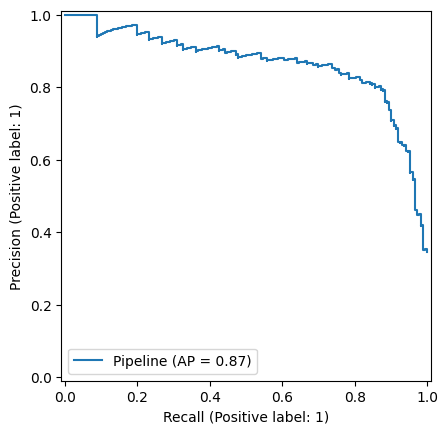

In [38]:

# Calculate precision-recall curve
prec, rec, thresholds = precision_recall_curve(test_df['toxic'], model_pipeline.predict_proba(test_df['comment'])[:, 1])

# Plot precision-recall curve using modern approach
display = PrecisionRecallDisplay.from_estimator(model_pipeline, test_df['comment'], test_df['toxic'])
plt.show()


In [39]:
np.where(prec > 0.95)


(array([458, 459, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 485, 486, 487, 488, 489, 490, 491, 492, 493,
        494, 495, 496, 497, 498, 499, 500]),)

In [40]:
thresholds[491]

np.float64(0.957267952094252)

In [41]:
precision_score(y_true=test_df ["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds [374])

0.88

In [ ]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[374])

0.6395348837209303

: 